## Linear Regression -- Converting manual computation to automatic
In this exercise we will convert manual computation of `forward()` `backward()` and `loss()` to pytorch framework functions. 

**A Recap**
 For each epoch, we computed following: 

*   `forward()` : Nodes operation and output prediction.
*   `loss()` : Calculated the loss between expected VS predicted outputs.
*   `backward()` : Computed gradients.
*   `nudge weights` : Updated weights. 

Ran `n` number of epochs to reduce loss to minimum. This loop is called **Training Loop**. 

At a point where the loss is minimum and it do not decrease any further is the time where we can stop training. These trained weights are called **model**, this model is used for further predictions, called **inference**. During inference we just run forward pass and weights remain unchanged. 

In [0]:
#
# Input data
# x = [1, 2, 3, 4, 5]
# y = [2, 4, 5, 4, 5]
# Expected output
# w = 0.6

from __future__ import print_function
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

# For reproducible results. 
def torch_seeding(seed):
    if torch.cuda.is_available():
      # for CUDA
      if torch.cuda.device_count() > 1:
        torch.cuda.manual_seed_all(seed)
      else:
        torch.cuda.manual_seed(seed)
      if torch.backends.cudnn.is_available():
        torch.backends.cudnn.deterministic=True

      return torch.device("cuda:0")

    else:
      # for CPU
      torch.manual_seed(seed)

      return torch.device("cpu")

device = torch_seeding(1122)

In [0]:
X = torch.tensor([[1], [2], [3], [4], [5]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [5], [4], [5]], dtype=torch.float32)

In [0]:
# From now on we will call forward() as our model.
model = nn.Linear(X.shape[1], Y.shape[1])

Wait! this is the first framework API we used to built Linear model. For its documentaion please [visit](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear). Where, Parameters:



bias – If set to False, the layer will not learn an additive bias. Default: True

*   **in_features** – size of each input sample (i.e. size of x)
*   **out_features** – size of each output sample (i.e. size of y)
*   **bias** – If set to False, the layer will not learn an additive bias. Default: True



In the below code snippet, we are using MSE `nn.MSELoss()` to calculate the loss and `torch.optim.SGD` optimizer for weights update.   

In [4]:
lr = 0.01
epochs = 1500

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    # forward pass
    y_pred = model(X)

    # loss
    l = loss(y_pred, Y)

    # clears old gradients from the last step
    optimizer.zero_grad()

    # backward pass
    l.backward()

    # nudge weights, causes optimizer to take a step based on the gradients of the parameters.
    optimizer.step()

    if epoch % 100 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch {}: w = {:.3f} b = {:.3f} loss = {}'.format((epoch+1), w.item(), b.item(), l))

epoch 1: w = 0.838 b = -0.670 loss = 7.684423923492432
epoch 101: w = 1.138 b = 0.257 loss = 1.1720104217529297
epoch 201: w = 0.984 b = 0.815 loss = 0.8315187692642212
epoch 301: w = 0.873 b = 1.213 loss = 0.658560037612915
epoch 401: w = 0.795 b = 1.496 loss = 0.570702850818634
epoch 501: w = 0.739 b = 1.699 loss = 0.5260739326477051
epoch 601: w = 0.699 b = 1.843 loss = 0.5034040212631226
epoch 701: w = 0.671 b = 1.945 loss = 0.49188852310180664
epoch 801: w = 0.650 b = 2.018 loss = 0.48603907227516174
epoch 901: w = 0.636 b = 2.071 loss = 0.4830675721168518
epoch 1001: w = 0.626 b = 2.108 loss = 0.4815581440925598
epoch 1101: w = 0.618 b = 2.134 loss = 0.48079147934913635
epoch 1201: w = 0.613 b = 2.153 loss = 0.48040199279785156
epoch 1301: w = 0.609 b = 2.167 loss = 0.48020419478416443
epoch 1401: w = 0.607 b = 2.176 loss = 0.48010382056236267


In [5]:
model.weight

Parameter containing:
tensor([[0.6047]], requires_grad=True)

In [6]:
# Number of parameters 
print('Number of parameters : {}'.format(len(list(model.parameters()))))
print('\nList of parameters : {}'.format(list(model.parameters())))

Number of parameters : 2

List of parameters : [Parameter containing:
tensor([[0.6047]], requires_grad=True), Parameter containing:
tensor([2.1830], requires_grad=True)]


# Working with large and Real dataset. 
We will perform the same exercise that we performed above but this time with sklearn toy dataset. Now that we are close to start playing with real world data, best time to read Andrej Karpathy's article '[A Recipe for Training Neural Networks](http://karpathy.github.io/2019/04/25/recipe/)'. Honestly, to me this is real GEM :)  

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

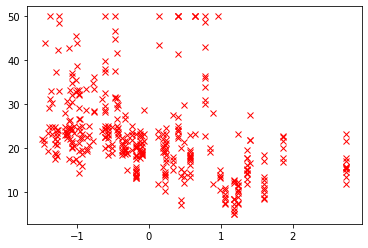

In [8]:
# Toy dataset
boston = load_boston()
X, Y = boston.data, boston.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=999)
X_train = X_train[:, 4:5]

# Z-Score : Normalize and standardized data (z = (x - u) / s)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
plt.plot(X_train, Y_train, 'rx')

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

Y_train = Y_train.view(Y_train.shape[0], 1)
Y_test = Y_test.view(Y_test.shape[0], 1)

epoch 10: w = -0.601 b = 3.626 loss = 458.0672912597656
epoch 20: w = -1.195 b = 7.085 loss = 330.66754150390625
epoch 30: w = -1.681 b = 9.911 loss = 245.61444091796875
epoch 40: w = -2.078 b = 12.220 loss = 188.83236694335938
epoch 50: w = -2.402 b = 14.107 loss = 150.9242401123047
epoch 60: w = -2.667 b = 15.649 loss = 125.6164321899414
epoch 70: w = -2.884 b = 16.908 loss = 108.72075653076172
epoch 80: w = -3.061 b = 17.937 loss = 97.44104766845703
epoch 90: w = -3.205 b = 18.778 loss = 89.91060638427734
epoch 100: w = -3.323 b = 19.465 loss = 84.88324737548828
epoch 110: w = -3.420 b = 20.027 loss = 81.52694702148438
epoch 120: w = -3.499 b = 20.486 loss = 79.28627014160156
epoch 130: w = -3.563 b = 20.860 loss = 77.79035186767578
epoch 140: w = -3.616 b = 21.167 loss = 76.79166412353516
epoch 150: w = -3.659 b = 21.417 loss = 76.12493896484375
epoch 160: w = -3.694 b = 21.621 loss = 75.67981719970703
epoch 170: w = -3.723 b = 21.788 loss = 75.3826675415039
epoch 180: w = -3.746 b

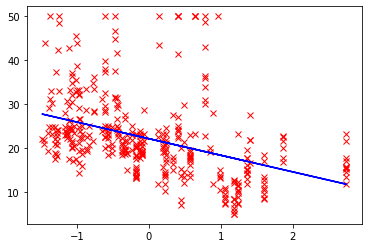

In [9]:
num_samples, num_features = X_train.shape

# Linear Model
model = nn.Linear(num_features, 1)

lr = 0.01
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Training loop
epochs = 200
for epoch in range(epochs):
    
    # forward pass
    Y_pred = model(X_train)

    # loss
    l = loss(Y_pred, Y_train)
    
    # clears old gradients from the last step
    optimizer.zero_grad()

    # Backward pass and update
    l.backward()
    
    # nudge weights, causes optimizer to take a step based on the gradients of the parameters.
    optimizer.step()

    if (epoch+1) % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch {}: w = {:.3f} b = {:.3f} loss = {}'.format((epoch+1), w.item(), b.item(), l))

# Inference: all the X_train points.  
predicted = model(X_train).detach().numpy()
plt.plot(X_train, Y_train, 'rx')
plt.plot(X_train, predicted, 'b')
plt.show()